In [1]:
import sys
!{sys.executable} -m pip install opendatasets
import sys
!{sys.executable} -m pip install pandas
import sys
!{sys.executable} -m pip install numpy
import sys
!{sys.executable} -m pip install matplotlib
import sys
!{sys.executable} -m pip install seaborn
import sys
!{sys.executable} -m pip install statsmodels

In [2]:
#Importing required packages and libraries for data downloading and exploration
import opendatasets as od
import re
import os

from datetime import datetime
from datetime import timezone
from datetime import date

import numpy as np
import pandas as pd
import random



import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') #defining plot style

In [3]:
#Downloading Data
#Link to download the data
opsd_url = 'https://data.open-power-system-data.org/time_series/2020-10-06/time_series_60min_singleindex.csv'

od.download(opsd_url) #data downloaded

130342912it [00:47, 2739438.87it/s]                               


In [4]:
#path to download csv file while creating a dataframe
path_to_csv = 'time_series_60min_singleindex.csv'

In [5]:
#Creating solar dataset
Solar_df = pd.read_csv(path_to_csv)
Solar_df.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


In [6]:
#remove csv path to free up the storage
# os.remove(path_to_csv)

In [7]:
#Exploring the Data
Solar_df.info

<bound method DataFrame.info of               utc_timestamp        cet_cest_timestamp  \
0      2014-12-31T23:00:00Z  2015-01-01T00:00:00+0100   
1      2015-01-01T00:00:00Z  2015-01-01T01:00:00+0100   
2      2015-01-01T01:00:00Z  2015-01-01T02:00:00+0100   
3      2015-01-01T02:00:00Z  2015-01-01T03:00:00+0100   
4      2015-01-01T03:00:00Z  2015-01-01T04:00:00+0100   
...                     ...                       ...   
50396  2020-09-30T19:00:00Z  2020-09-30T21:00:00+0200   
50397  2020-09-30T20:00:00Z  2020-09-30T22:00:00+0200   
50398  2020-09-30T21:00:00Z  2020-09-30T23:00:00+0200   
50399  2020-09-30T22:00:00Z  2020-10-01T00:00:00+0200   
50400  2020-09-30T23:00:00Z  2020-10-01T01:00:00+0200   

       AT_load_actual_entsoe_transparency  \
0                                     NaN   
1                                  5946.0   
2                                  5726.0   
3                                  5347.0   
4                                  5249.0   
...          

In [8]:
#Null values
Solar_df.isnull().sum()

utc_timestamp                               0
cet_cest_timestamp                          0
AT_load_actual_entsoe_transparency          1
AT_load_forecast_entsoe_transparency        1
AT_price_day_ahead                      17556
                                        ...  
SK_load_forecast_entsoe_transparency        3
SK_solar_generation_actual                391
SK_wind_onshore_generation_actual       40722
UA_load_actual_entsoe_transparency      24766
UA_load_forecast_entsoe_transparency    24988
Length: 300, dtype: int64

In [9]:
Solar_df.describe()

,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,BE_wind_generation_actual,BE_wind_offshore_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
count,50400.000000,50400.000000,32845.000000,50339.000000,50352.000000,50400.000000,50376.000000,50385.000000,46466.000000,46466.000000,...,50340.000000,50398.000000,50391.000000,50379.000000,5.037300e+04,50398.000000,50010.000000,9679.000000,25635.000000,25413.000000
mean,7070.148631,7039.848552,33.934663,135.280121,729.653261,9808.383929,9759.323567,393.402158,779.920474,433.482914,...,1462.742614,1465.434762,31.886199,0.546785,3.336826e+03,3288.454423,60.563224,0.684807,17006.680807,17290.802306
std,1400.263167,1355.382837,14.944863,198.955378,692.002497,1393.548610,1380.214097,621.803385,665.931016,400.823333,...,262.562188,260.132266,47.972831,0.726016,9.678832e+03,457.612965,91.983827,2.531283,2776.794985,2741.479932
min,664.000000,3739.000000,-76.000000,0.000000,0.000000,6245.000000,6522.000000,0.000000,1.090000,0.000000,...,24.240000,753.000000,0.000000,0.000000,1.830000e+03,2040.000000,0.000000,0.000000,10905.000000,11450.000000
25%,5941.000000,5941.000000,25.000000,0.000000,162.000000,8706.000000,8671.000000,0.000000,245.532500,103.652500,...,1252.360000,1253.000000,0.040000,0.000000,2.942000e+03,2940.000000,0.000000,0.000000,15048.000000,15420.000000
50%,7032.000000,7018.000000,33.000000,18.000000,493.000000,9809.000000,9757.000000,10.670000,571.515000,317.345000,...,1463.970000,1474.000000,1.850000,0.270000,3.295000e+03,3300.000000,2.900000,0.300000,16678.000000,16905.000000
75%,8079.000000,7986.000000,42.000000,224.000000,1141.000000,10852.000000,10813.250000,596.400000,1171.482500,650.000000,...,1658.702500,1662.000000,52.530000,0.790000,3.600000e+03,3600.000000,97.900000,0.800000,18862.000000,19173.000000
max,10803.000000,11608.000000,187.000000,1166.000000,2969.000000,13670.000000,13454.000000,3281.400000,3252.680000,1944.160000,...,2402.250000,2206.000000,717.820000,4.670000,2.170811e+06,4520.000000,387.200000,36.500000,24684.000000,24739.000000


In [10]:
Solar_df.nunique()

utc_timestamp                           50401
cet_cest_timestamp                      50401
AT_load_actual_entsoe_transparency       6268
AT_load_forecast_entsoe_transparency     6101
AT_price_day_ahead                        181
                                        ...  
SK_load_forecast_entsoe_transparency      271
SK_solar_generation_actual               3494
SK_wind_onshore_generation_actual          68
UA_load_actual_entsoe_transparency       9966
UA_load_forecast_entsoe_transparency     1317
Length: 300, dtype: int64

In [11]:
Solar_df.duplicated().sum()

0

In [12]:
#Creating German Dataset

#german columns reruired for forecasting
german_columns = [col for col in list(Solar_df) 
                  if re.search('DE_solar_', col) #checks for columns with DE
                  and not re.search('DE_LU_', col) #Luxembourg is excluded
                 #German transmission system operators like Amprion, Tennet, 
                 #TransnetBW, and 50Hertz, focusing the dataset more 
                 #generally on nationwide data.
                  and not re.search('_amprion_', col)
                  and not re.search('_tennet_', col)
                  and not re.search('_transnetbw_', col)
                  and not re.search('_50hertz_', col)
                 ]
german_columns

['DE_solar_capacity', 'DE_solar_generation_actual', 'DE_solar_profile']

In [13]:
#Add DE_load_actual_entsoe_transparency
# Creating German Dataset
# German columns required for forecasting
german_columns = [col for col in list(Solar_df) 
                  if (re.search('DE_solar_', col) or col == 'DE_load_actual_entsoe_transparency')  # checks for columns with DE_solar_ or DE_load_actual_entsoe_transparency
                  and not re.search('DE_LU_', col)  # Luxembourg is excluded
                  # German transmission system operators like Amprion, Tennet, 
                  # TransnetBW, and 50Hertz, focusing the dataset more 
                  # generally on nationwide data.
                  and not re.search('_amprion_', col)
                  and not re.search('_tennet_', col)
                  and not re.search('_transnetbw_', col)
                  and not re.search('_50hertz_', col)
                 ]

german_columns

['DE_load_actual_entsoe_transparency',
 'DE_solar_capacity',
 'DE_solar_generation_actual',
 'DE_solar_profile']

In [14]:
#create new dataset which only icludes the filtered columns
Ger_Solar_df = Solar_df[['cet_cest_timestamp'] + german_columns]
Ger_Solar_df.head()

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile
0,2015-01-01T00:00:00+0100,NaN,37248.0,NaN,NaN
1,2015-01-01T01:00:00+0100,41151.0,37248.0,NaN,NaN
2,2015-01-01T02:00:00+0100,40135.0,37248.0,NaN,NaN
3,2015-01-01T03:00:00+0100,39106.0,37248.0,NaN,NaN
4,2015-01-01T04:00:00+0100,38765.0,37248.0,NaN,NaN


In [15]:
#remove profile data columns
pct_columns = [col for col in list(Ger_Solar_df) if re.search('_profile', col)]
Ger_Solar_df.drop(pct_columns, axis=1, inplace=True)

Ger_Solar_df.head()

C:\Users\aksha\AppData\Local\Temp\ipykernel_17612\2792943959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ger_Solar_df.drop(pct_columns, axis=1, inplace=True)


,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual
0,2015-01-01T00:00:00+0100,NaN,37248.0,NaN
1,2015-01-01T01:00:00+0100,41151.0,37248.0,NaN
2,2015-01-01T02:00:00+0100,40135.0,37248.0,NaN
3,2015-01-01T03:00:00+0100,39106.0,37248.0,NaN
4,2015-01-01T04:00:00+0100,38765.0,37248.0,NaN


In [16]:
#Data Exploration for Data Properties

In [17]:
Ger_Solar_df.shape

(50401, 4)

In [18]:
Ger_Solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cet_cest_timestamp                  50401 non-null  object 
 1   DE_load_actual_entsoe_transparency  50400 non-null  float64
 2   DE_solar_capacity                   43800 non-null  float64
 3   DE_solar_generation_actual          50297 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [19]:
Ger_Solar_df.isnull().sum()

cet_cest_timestamp                       0
DE_load_actual_entsoe_transparency       1
DE_solar_capacity                     6601
DE_solar_generation_actual             104
dtype: int64

In [20]:
Ger_Solar_df.describe()

,DE_load_actual_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual
count,50400.000000,43800.000000,50297.000000
mean,55492.468552,42378.015114,4566.042905
std,10015.431042,4306.391773,6940.267590
min,31307.000000,37248.000000,0.000000
25%,47106.000000,38810.000000,0.000000
50%,55092.000000,40941.000000,173.000000
75%,64309.250000,46092.000000,7342.000000
max,77549.000000,50508.000000,32947.000000


In [21]:
#Correlation
numeric_cols = Ger_Solar_df.select_dtypes(include=[np.number])  # This selects only numeric columns
correlation_matrix = numeric_cols.corr()  # Compute the correlation matrix
print(correlation_matrix)

                                    DE_load_actual_entsoe_transparency  \
DE_load_actual_entsoe_transparency                            1.000000   
DE_solar_capacity                                             0.031524   
DE_solar_generation_actual                                    0.312784   

                                    DE_solar_capacity  \
DE_load_actual_entsoe_transparency           0.031524   
DE_solar_capacity                            1.000000   
DE_solar_generation_actual                   0.044652   

                                    DE_solar_generation_actual  
DE_load_actual_entsoe_transparency                    0.312784  
DE_solar_capacity                                     0.044652  
DE_solar_generation_actual                            1.000000  


In [22]:
Ger_Solar_df.nunique()

cet_cest_timestamp                    50401
DE_load_actual_entsoe_transparency    27369
DE_solar_capacity                      1464
DE_solar_generation_actual            14956
dtype: int64

In [23]:
Ger_Solar_df.duplicated().sum()

0

In [24]:
# saving the original dataset for Germany

Ger_Solar_df.to_csv('GermanySolar.csv', sep='\t', encoding='utf-8', index=False)

In [25]:
# create daily column
#Ger_Solar_df = Ger_Solar_df[list(Ger_Solar_df)]
#Ger_Solar_df.head()

In [26]:
#Data Processing

In [27]:
#Handling Missing values

In [28]:
#Values between midnight to 7 am 

In [29]:
#check for null values
Ger_Solar_df.isnull().sum()

cet_cest_timestamp                       0
DE_load_actual_entsoe_transparency       1
DE_solar_capacity                     6601
DE_solar_generation_actual             104
dtype: int64

In [30]:
#Missing data on 2015-01-01 is from midnight to 7am in winter hence filling 0 
# Convert 'cet_cest_timestamp' column to datetime format properly handling timezones
Ger_Solar_df['cet_cest_timestamp'] = pd.to_datetime(Ger_Solar_df['cet_cest_timestamp'], utc=True)
Ger_Solar_df['cet_cest_timestamp'] = Ger_Solar_df['cet_cest_timestamp'].dt.tz_convert('Europe/Berlin')

C:\Users\aksha\AppData\Local\Temp\ipykernel_17612\1740771142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ger_Solar_df['cet_cest_timestamp'] = pd.to_datetime(Ger_Solar_df['cet_cest_timestamp'], utc=True)
C:\Users\aksha\AppData\Local\Temp\ipykernel_17612\1740771142.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ger_Solar_df['cet_cest_timestamp'] = Ger_Solar_df['cet_cest_timestamp'].dt.tz_convert('Europe/Berlin')


In [31]:
# Define the start and end times for the specific missing data period with timezone awareness
start_time = pd.to_datetime('2015-01-01 00:00:00+0100', utc=True).tz_convert('Europe/Berlin')
end_time = pd.to_datetime('2015-01-01 07:00:00+0100', utc=True).tz_convert('Europe/Berlin')

In [32]:
# Fill NaN values with 0 in 'DE_solar_generation_actual' for the specified time range
Ger_Solar_df.loc[(Ger_Solar_df['cet_cest_timestamp'] >= start_time) & 
                  (Ger_Solar_df['cet_cest_timestamp'] <= end_time), 'DE_solar_generation_actual'] = Ger_Solar_df.loc[(Ger_Solar_df['cet_cest_timestamp'] >= start_time) & 
                                                                                                                   (Ger_Solar_df['cet_cest_timestamp'] <= end_time), 'DE_solar_generation_actual'].fillna(0)

In [33]:
Ger_Solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype                        
---  ------                              --------------  -----                        
 0   cet_cest_timestamp                  50401 non-null  datetime64[ns, Europe/Berlin]
 1   DE_load_actual_entsoe_transparency  50400 non-null  float64                      
 2   DE_solar_capacity                   43800 non-null  float64                      
 3   DE_solar_generation_actual          50305 non-null  float64                      
dtypes: datetime64[ns, Europe/Berlin](1), float64(3)
memory usage: 1.5 MB


In [34]:
Ger_Solar_df.DE_solar_generation_actual.isnull().sum()

96

In [35]:
Ger_Solar_df.head()

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual
0,2015-01-01 00:00:00+01:00,NaN,37248.0,0.0
1,2015-01-01 01:00:00+01:00,41151.0,37248.0,0.0
2,2015-01-01 02:00:00+01:00,40135.0,37248.0,0.0
3,2015-01-01 03:00:00+01:00,39106.0,37248.0,0.0
4,2015-01-01 04:00:00+01:00,38765.0,37248.0,0.0


In [36]:
# Identify missing values indices
missing_indices = Ger_Solar_df['DE_solar_generation_actual'].isna()

# Print some info about missing values
print("Missing values in 'DE_solar_generation_actual':", missing_indices.sum())
print("Indices with missing values:")
print(Ger_Solar_df[missing_indices].to_string())

Missing values in 'DE_solar_generation_actual': 96
Indices with missing values:
             cet_cest_timestamp  DE_load_actual_entsoe_transparency  DE_solar_capacity  DE_solar_generation_actual
1393  2015-02-28 01:00:00+01:00                             50517.0            37435.0                         NaN
1394  2015-02-28 02:00:00+01:00                             49475.0            37435.0                         NaN
1395  2015-02-28 03:00:00+01:00                             49074.0            37435.0                         NaN
1396  2015-02-28 04:00:00+01:00                             48674.0            37435.0                         NaN
1397  2015-02-28 05:00:00+01:00                             48654.0            37435.0                         NaN
1398  2015-02-28 06:00:00+01:00                             49402.0            37435.0                         NaN
1399  2015-02-28 07:00:00+01:00                             51550.0            37435.0                         NaN


In [37]:
#2016-10-27, 2016-12-08, 2016-05-31 have the missing values which are at night, so we can safely fill those values with zero
# Dates with missing values at night ['2016-10-27', '2016-12-08', '2016-05-31']

#Also the other dates have the data missing in block, we will do interpolation for those after creating the daily dataset. 
#This is done because if we interpolate them now, the values are wrongly interpolated as zero. 
#Also they need to be filled as zero so we do not lose the dates in teh daily dataset.
#We will notes dates for interpolation
interpolation_dates = ['2016-12-09', '2016-10-28', '2016-06-01', '2015-02-28']

In [38]:
# Replace all missing values in 'DE_solar_generation_actual' with zero
# Ger_Solar_df['DE_solar_generation_actual'].fillna(0, inplace=True)

In [39]:
Ger_Solar_df.isnull().sum()

cet_cest_timestamp                       0
DE_load_actual_entsoe_transparency       1
DE_solar_capacity                     6601
DE_solar_generation_actual              96
dtype: int64

In [40]:
#Now we handle the rest of the values which were missing in blocks. We will use Linear Interpolation to do that 
#If we were to see the days we have 2016-12-09, 2016-10-28, 2016-06-01, 2015-02-28
#First we will create daily dataset

In [41]:
#Create Daily Data for interpolation
import math
import datetime
#Now we will interpoloate the data for only the interpolation_dates and fill the interpolated values for those dates
#INTERPOLATE VALUES:
date_key = 'cet_cest_timestamp'
Ger_Solar_df.sort_values(by=date_key, inplace=True)
rows = Ger_Solar_df.iterrows()
column_name = 'DE_solar_generation_actual'
for index,row in rows:
    if math.isnan(row[column_name]):
        prev_index = index - 24
        
        prev_row = Ger_Solar_df.iloc[index - 24]
        next_row = Ger_Solar_df.iloc[index + 24]
        
        avg = ((  prev_row[column_name] if prev_index >= 0 else next_row[column_name]) + next_row[column_name])/2
        Ger_Solar_df.loc[index, column_name] = avg
        
Ger_Solar_df.to_csv('GermanySolar.csv', sep='\t', encoding='utf-8', index=False)

C:\Users\aksha\AppData\Local\Temp\ipykernel_17612\3710074536.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ger_Solar_df.sort_values(by=date_key, inplace=True)


In [42]:
# Ensure 'cet_cest_timestamp' is the index and is in DateTime format
Ger_Solar_df['cet_cest_timestamp'] = pd.to_datetime(Ger_Solar_df['cet_cest_timestamp'], utc=True)
Ger_Solar_df.set_index('cet_cest_timestamp', inplace=True)
Ger_Solar_df.sort_index(inplace=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_17612\2223893537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ger_Solar_df['cet_cest_timestamp'] = pd.to_datetime(Ger_Solar_df['cet_cest_timestamp'], utc=True)


In [43]:
# Resample to daily data, summing up the generation and capacity for each day
ger_daily_generation_df = Ger_Solar_df.resample('D').sum()



In [44]:
# Convert the index to date only
#ger_daily_generation_df.index = ger_daily_generation_df.index.date

In [45]:
ger_daily_generation_df.head()

,DE_load_actual_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual
cet_cest_timestamp,,,
2014-12-31 00:00:00+00:00,0.0,37248.0,0.0
2015-01-01 00:00:00+00:00,1088317.0,893954.0,17098.0
2015-01-02 00:00:00+00:00,1246588.0,894000.0,7757.0
2015-01-03 00:00:00+00:00,1117554.0,894000.0,7237.0
2015-01-04 00:00:00+00:00,1081980.0,894002.0,19982.0


In [46]:
ger_daily_generation_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2101 entries, 2014-12-31 00:00:00+00:00 to 2020-09-30 00:00:00+00:00
Freq: D
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   DE_load_actual_entsoe_transparency  2101 non-null   float64
 1   DE_solar_capacity                   2101 non-null   float64
 2   DE_solar_generation_actual          2101 non-null   float64
dtypes: float64(3)
memory usage: 65.7 KB


In [47]:
ger_daily_generation_df.isnull().sum()

DE_load_actual_entsoe_transparency    0
DE_solar_capacity                     0
DE_solar_generation_actual            0
dtype: int64

In [48]:
#Handle Outliers

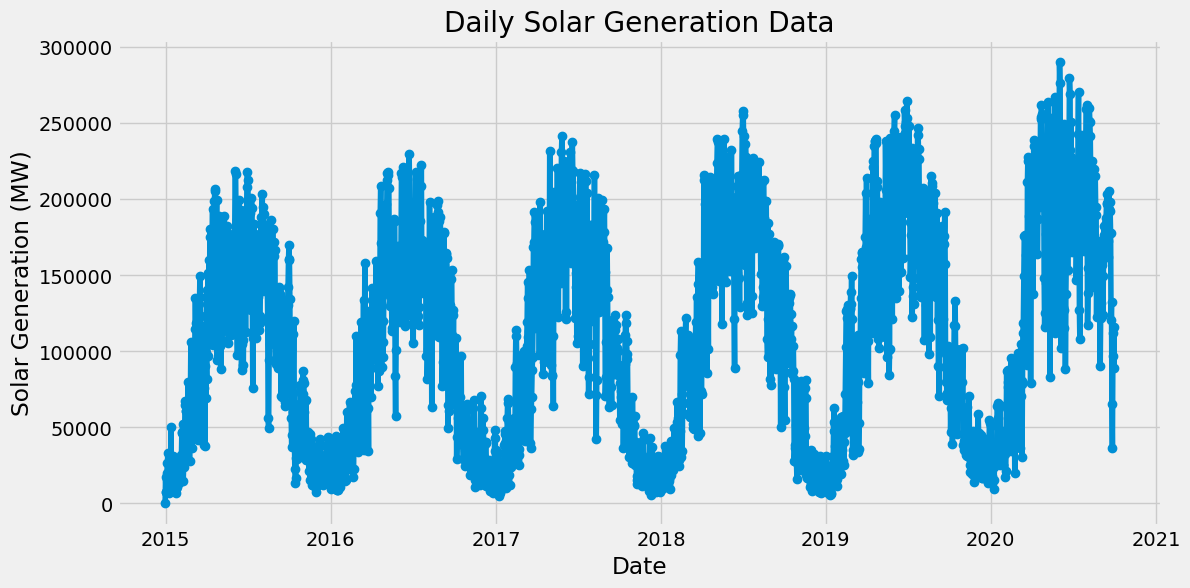

In [49]:
# Plotting the daily solar generation data
plt.figure(figsize=(12, 6))
plt.plot(ger_daily_generation_df.index, ger_daily_generation_df['DE_solar_generation_actual'], marker='o', linestyle='-')
plt.title('Daily Solar Generation Data')
plt.xlabel('Date')
plt.ylabel('Solar Generation (MW)')
plt.grid(True)
plt.show()


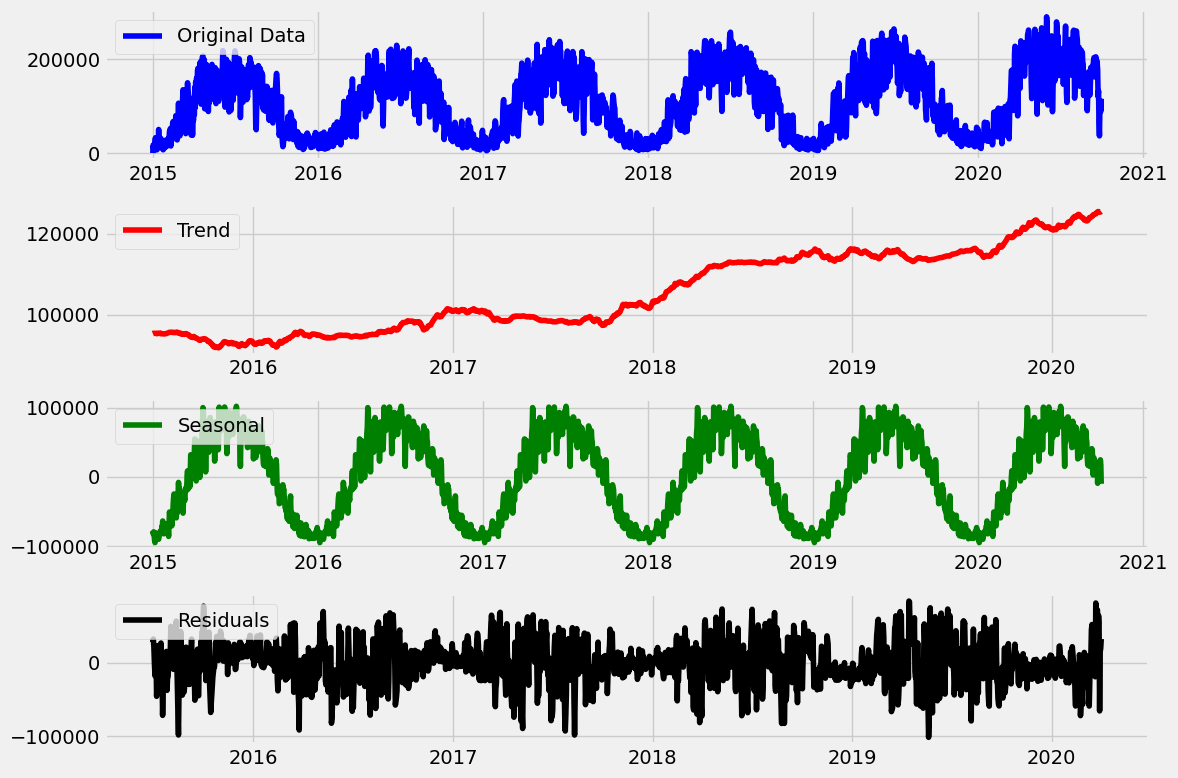

In [50]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming the DataFrame index is properly set as a datetime index
ger_daily_generation_df.index = pd.to_datetime(ger_daily_generation_df.index)

# Decompose the data to identify and adjust for seasonality
decomposition = seasonal_decompose(ger_daily_generation_df['DE_solar_generation_actual'], model='additive', period=365)
ger_daily_generation_df['trend'] = decomposition.trend
ger_daily_generation_df['seasonal'] = decomposition.seasonal
ger_daily_generation_df['residual'] = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(ger_daily_generation_df['DE_solar_generation_actual'], label='Original Data', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(ger_daily_generation_df['trend'], label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(ger_daily_generation_df['seasonal'], label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(ger_daily_generation_df['residual'], label='Residuals', color='black')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

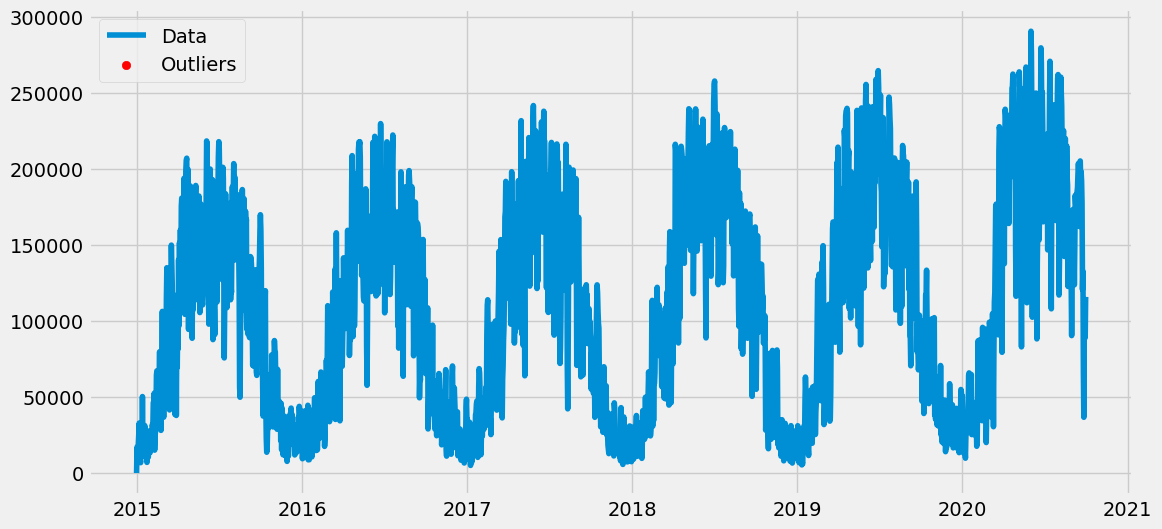

In [51]:
import numpy as np

# Calculate the standard deviation of the residuals
std_dev = np.std(ger_daily_generation_df['residual'].dropna())

# Identify outliers as points where the residual is beyond 3 standard deviations from the mean
ger_daily_generation_df['is_outlier'] = np.abs(ger_daily_generation_df['residual']) > 4 * std_dev

# Plotting to see the outliers
plt.figure(figsize=(12, 6))
plt.plot(ger_daily_generation_df.index, ger_daily_generation_df['DE_solar_generation_actual'], label='Data')
plt.scatter(ger_daily_generation_df.index[ger_daily_generation_df['is_outlier']], 
            ger_daily_generation_df['DE_solar_generation_actual'][ger_daily_generation_df['is_outlier']], 
            color='red', label='Outliers')
plt.legend()
plt.show()


In [52]:
# Assuming 'is_outlier' has been properly calculated and added to the DataFrame
outliers_df = ger_daily_generation_df[ger_daily_generation_df['is_outlier']]

# Display the outliers
print(outliers_df[['DE_solar_generation_actual']])


Empty DataFrame
Columns: [DE_solar_generation_actual]
Index: []


In [53]:
# Function to get context around outliers- one day before and after
def get_outlier_context(df, window=1):
    indices = df.index[df['is_outlier']]
    expanded_indices = []
    for idx in indices:
        expanded_range = pd.date_range(start=idx - pd.Timedelta(days=window), 
                                       end=idx + pd.Timedelta(days=window), 
                                       freq='D')
        expanded_indices.extend(expanded_range)
    expanded_indices = list(set(expanded_indices))  # Remove duplicates
    expanded_indices.sort()
    return df.loc[expanded_indices]

# Get context around each outlier
outlier_context_df = get_outlier_context(ger_daily_generation_df, window=1)

# Display the context of outliers
print(outlier_context_df[['DE_solar_generation_actual']])


Empty DataFrame
Columns: [DE_solar_generation_actual]
Index: []


C:\Users\aksha\AppData\Local\Temp\ipykernel_17612\3624679710.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ger_daily_generation_df['DE_solar_generation_actual'].interpolate(method='linear', inplace=True)
C:\Users\aksha\AppData\Local\Temp\ipykernel_17612\3624679710.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

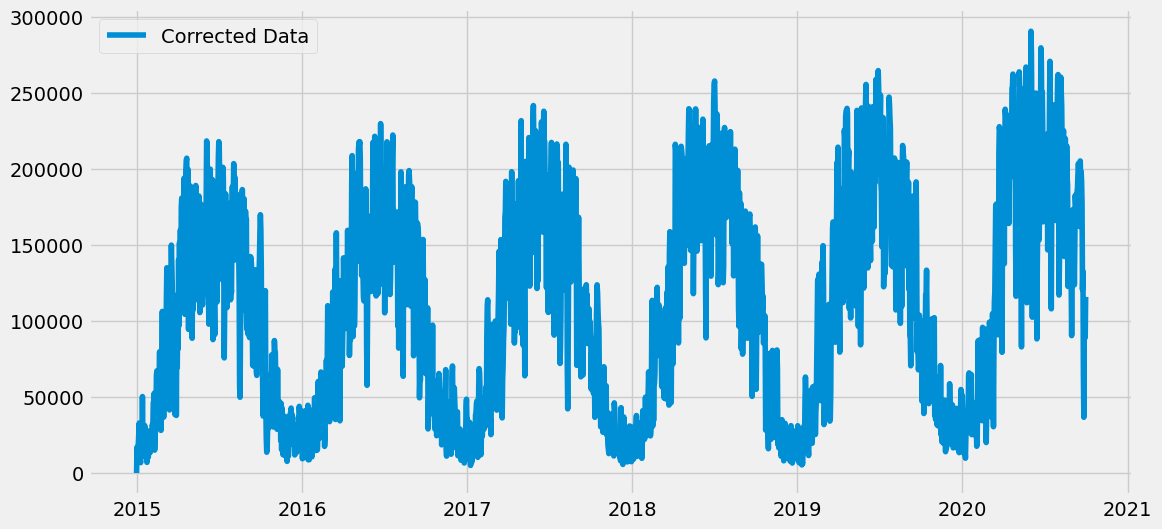

In [54]:
# Interpolate to fill outliers
ger_daily_generation_df.loc[ger_daily_generation_df['is_outlier'], 'DE_solar_generation_actual'] = np.nan
ger_daily_generation_df['DE_solar_generation_actual'].interpolate(method='linear', inplace=True)

# Optionally, check if you want to fill remaining NaNs at the edges
ger_daily_generation_df['DE_solar_generation_actual'].fillna(method='bfill', inplace=True)
ger_daily_generation_df['DE_solar_generation_actual'].fillna(method='ffill', inplace=True)

# Replot to verify corrections
plt.figure(figsize=(12, 6))
plt.plot(ger_daily_generation_df.index, ger_daily_generation_df['DE_solar_generation_actual'], label='Corrected Data')
plt.legend()
plt.show()

In [55]:

ger_daily_generation_df.head()

,DE_load_actual_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,trend,seasonal,residual,is_outlier
cet_cest_timestamp,,,,,,,
2014-12-31 00:00:00+00:00,0.0,37248.0,0.0,NaN,-78093.017296,NaN,False
2015-01-01 00:00:00+00:00,1088317.0,893954.0,17098.0,NaN,-82669.621679,NaN,False
2015-01-02 00:00:00+00:00,1246588.0,894000.0,7757.0,NaN,-79447.392638,NaN,False
2015-01-03 00:00:00+00:00,1117554.0,894000.0,7237.0,NaN,-83831.889077,NaN,False
2015-01-04 00:00:00+00:00,1081980.0,894002.0,19982.0,NaN,-91822.357570,NaN,False


In [56]:
# WRITE TO FILE


In [57]:
#

In [58]:
#Train-Test Split

In [59]:
# Filter the data for the given date range
ger_daily_generation_df.index = pd.to_datetime(ger_daily_generation_df.index)

start_date = '2015-01-01'
end_date = '2019-12-31'  # To keep 2020 for testing



In [60]:
# Subset the DataFrame to include only the desired column within the specified date range
column_names = ['DE_solar_generation_actual']
train_data = ger_daily_generation_df.loc[start_date:end_date, column_names]
test_data = ger_daily_generation_df.loc[end_date:, column_names]

In [61]:
# Reset the index for further use
train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)
ger_daily_generation_df.reset_index(inplace=True)


In [62]:
train_data.head()

,cet_cest_timestamp,DE_solar_generation_actual
0,2015-01-01 00:00:00+00:00,17098.0
1,2015-01-02 00:00:00+00:00,7757.0
2,2015-01-03 00:00:00+00:00,7237.0
3,2015-01-04 00:00:00+00:00,19982.0
4,2015-01-05 00:00:00+00:00,26522.0


In [63]:
test_data.head()

,cet_cest_timestamp,DE_solar_generation_actual
0,2019-12-31 00:00:00+00:00,36562.0
1,2020-01-01 00:00:00+00:00,50890.0
2,2020-01-02 00:00:00+00:00,39748.0
3,2020-01-03 00:00:00+00:00,18258.0
4,2020-01-04 00:00:00+00:00,13149.0


In [64]:
# Save the test and train data to csv file which can be later imported for model training
csv_base_path = 'ger_daily_generation'

ger_daily_generation_df.to_csv('all_'+csv_base_path+'.csv', sep='\t', encoding='utf-8' ,index = False)
train_data.to_csv('train_'+csv_base_path+'.csv', sep='\t', encoding='utf-8' ,index = False)
test_data.to_csv('test_'+csv_base_path+'.csv', sep='\t', encoding='utf-8' ,index = False)


In [65]:
#

In [66]:
#Data Augmentation

In [67]:
# Function to slice the time series
def slice_time_series(data, window_size, step_size):
    slices = []
    indices = []
    for start in range(0, len(data) - window_size + 1, step_size):
        slices.append(data[start:start + window_size])
        indices.append(data.index[start:start + window_size])
    return np.array(slices), indices

In [68]:
# Parameters
window_size = 365  # One year of daily data
step_size = 30  # One month step

In [69]:
# Apply slicing
sliced_data, indices = slice_time_series(train_data['DE_solar_generation_actual'], window_size, step_size)

print(sliced_data)

[[ 17098.   7757.   7237. ...  32623.  27269.  20226.]
 [ 20211.  24680.  20268. ...  36616.  49518.  27900.]
 [ 65601. 101146.  70464. ... 110024.  71204.  42625.]
 ...
 [134785. 137382. 137123. ...  55422.  81450.  84290.]
 [ 42740.  41930.  23394. ...  33068.  31003.  63537.]
 [ 18571.  17306.  19737. ...  24022.  29477.  44928.]]


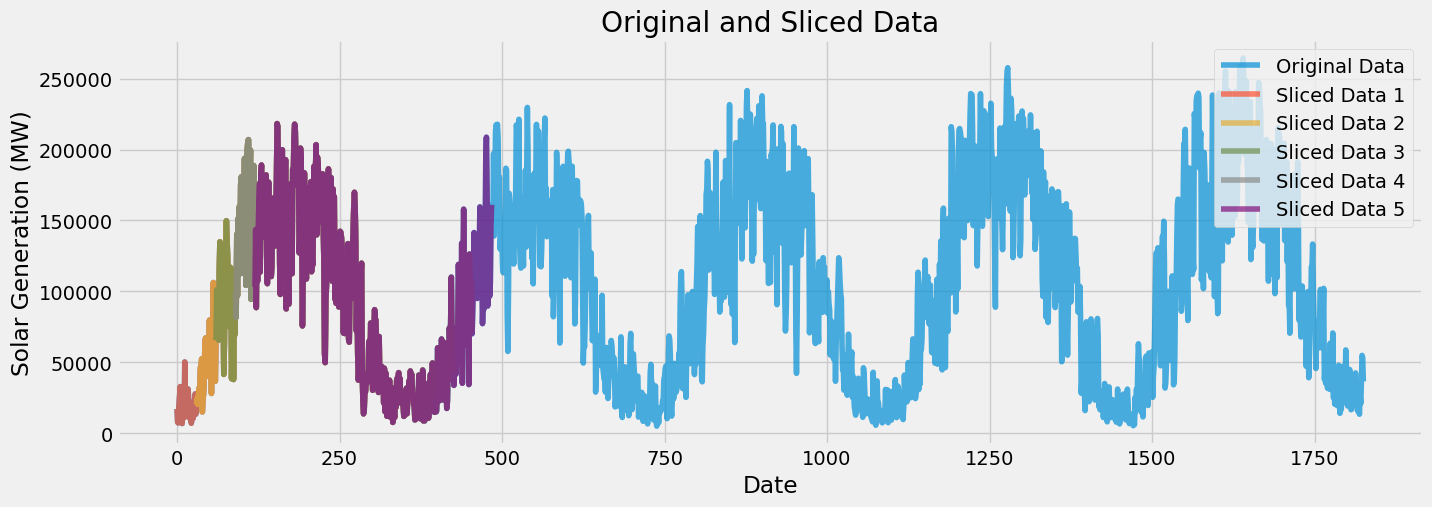

In [70]:
# Plot original and some sliced data examples
plt.figure(figsize=(15, 5))
plt.plot(train_data.index, train_data['DE_solar_generation_actual'], label='Original Data', alpha=0.7)
for i in range(min(5, len(sliced_data))):  # Plot a few examples of sliced data
    plt.plot(indices[i], sliced_data[i], label=f'Sliced Data {i+1}', alpha=0.7)
plt.legend()
plt.title('Original and Sliced Data')
plt.xlabel('Date')
plt.ylabel('Solar Generation (MW)')
plt.show()

In [71]:
# Check the shape of the sliced data
print(f'Number of slices: {sliced_data.shape[0]}, Slice length: {sliced_data.shape[1]}')

Number of slices: 49, Slice length: 365


In [72]:
# Display test data information
print(f'Test data shape: {test_data.shape}')

Test data shape: (275, 2)


In [73]:
# Print the date ranges for each slice
for i, idx in enumerate(indices):
    print(f'Slice {i+1}: From {idx[0]} to {idx[-1]}')

Slice 1: From 0 to 364
Slice 2: From 30 to 394
Slice 3: From 60 to 424
Slice 4: From 90 to 454
Slice 5: From 120 to 484
Slice 6: From 150 to 514
Slice 7: From 180 to 544
Slice 8: From 210 to 574
Slice 9: From 240 to 604
Slice 10: From 270 to 634
Slice 11: From 300 to 664
Slice 12: From 330 to 694
Slice 13: From 360 to 724
Slice 14: From 390 to 754
Slice 15: From 420 to 784
Slice 16: From 450 to 814
Slice 17: From 480 to 844
Slice 18: From 510 to 874
Slice 19: From 540 to 904
Slice 20: From 570 to 934
Slice 21: From 600 to 964
Slice 22: From 630 to 994
Slice 23: From 660 to 1024
Slice 24: From 690 to 1054
Slice 25: From 720 to 1084
Slice 26: From 750 to 1114
Slice 27: From 780 to 1144
Slice 28: From 810 to 1174
Slice 29: From 840 to 1204
Slice 30: From 870 to 1234
Slice 31: From 900 to 1264
Slice 32: From 930 to 1294
Slice 33: From 960 to 1324
Slice 34: From 990 to 1354
Slice 35: From 1020 to 1384
Slice 36: From 1050 to 1414
Slice 37: From 1080 to 1444
Slice 38: From 1110 to 1474
Slice 

In [74]:
#Save the sliced data to csv file which can be later imported for model validation
import numpy
numpy.savetxt('sliced_'+csv_base_path+'.txt', sliced_data, fmt='%d')